# Grade Calculator Function and Visualization 

## Defining the Function

In [2]:
# importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Grade Calculator
def calculate_grades(student_scores):
    """This function calculates the grades out of a list of multiple students.
    
    In this function a list of dictionaries including student names and scores is passed. 
    From this information the program calcultes the average and total grade for every student.\n
    Following grade scale will be used:\n
        A: 90+
        B: 80-89
        C: 70-79
        D: 60-69
        F: <60

    Args:
        student_scores (list): a list containing a dictionary with the keys 'name' and 'scores' 
                               scores should also be formatted as a list or tuple
    
    Returns:
        (DataFrame): Returns the same list with 2 added keys per dictionary\n
                'average': The average score for every student\n
                'grade': the calculated grade for every student
                'missing score': adding a note if a score is missing:
                                None if all scores are contained as int or float
                                Missing: Reasons: if scores are missing + reason for it
    
    """
    # preventing errors          
    for student in student_scores:
        if len(student['scores']) == 0:  # if list is empty students get no grades/average
            print(f'{student["name"]} has no scores. Grade can\'t be evaluated.\n')
            continue  # skips to the next student

        # creating a list of valid scores and checking for empty sets
        valid_scores = [score for score in student['scores'] if isinstance(score, (int,float))] 

        if len(valid_scores) == 0:
            print(f'{student["name"]} has no valid scores! Grade can\'t be evaluated.\n')
            continue
        # calculating average scores
        else:
            average = sum(valid_scores) / len(valid_scores)
            student['average'] = average

            # computing the grades based on average score
            if average >= 90:
                grade = 'A'
            elif average >= 80:
                grade = 'B'
            elif average >= 70:
                grade = 'C'
            elif average >= 60:
                grade = 'D'
            else: 
                grade = 'F'
            student['grade']=grade


        # also creating invalid value list, so a note can be added
        invalid_values = [score for score in student['scores'] if not isinstance(score, (int,float))]
        if invalid_values:
            student['missing score'] = f'Missing: {len(invalid_values)} Reason: {", ".join(map(str, invalid_values))}'
        else:
            student['missing score'] = 'None'
        
    # creating the DataFrame
    return pd.DataFrame(student_scores) 

## Ingesting Data

In [3]:
# implementing the scores of class 12a
scores_class_12a = [
    {'name': 'Alice', 'scores': [85, 92, 78]},
    {'name': 'Bob', 'scores': (90, 88, 95)},
    {'name': 'Charlie', 'scores': [65, 70, 68]},
    {'name': 'David', 'scores': [95, 98, 100]},
    {'name': 'Eve', 'scores': [81, 84, 89]},
    {'name': 'Frank', 'scores': [77, 72, 79]},
    {'name': 'Grace', 'scores': [55, 58, 62]},
    {'name': 'Heidi', 'scores': [91, 88, 94]},
    {'name': 'Ivan', 'scores': [73, 75, 71]},
    {'name': 'Judy', 'scores': [45, 52, 59]},
    {'name': 'Kevin', 'scores': [88, 90, 85]},
    {'name': 'Linda', 'scores': (68, 71, 75)},
    {'name': 'Michael', 'scores': [99, 97, 96]},
    {'name': 'Nancy', 'scores': [82, 85, 80]},
    {'name': 'Olivia', 'scores': [76, 78, 77]},
    {'name': 'Peter', 'scores': [61, 64, 66]},
    {'name': 'Quincy', 'scores': [89, 91, 87]},
    {'name': 'Rachel', 'scores': [92, 'absent', 88]}, 
    {'name': 'Sam', 'scores': []},                   
    {'name': 'Tina', 'scores': (70, 68, 57)},             
    {'name': 'Ursula', 'scores': [100, 95, 92]},  
    {'name': 'Victor', 'scores': ('ill', 80, 75)},  
    {'name': 'Wendy', 'scores': ()},                  
    {'name': 'Xavier', 'scores': [58, 23, 0]},   
    {'name': 'Yvonne', 'scores': [78, 81, 'N/A']},   
    {'name': 'Jonathan', 'scores': ['absent', 'ill' 'N/A']} 
]

# calling the function
grades_12a = calculate_grades(scores_class_12a)

#changing the index so it starts at 1
grades_12a.index = grades_12a.index + 1

# displaying the DataFrame
grades_12a

Sam has no scores. Grade can't be evaluated.

Wendy has no scores. Grade can't be evaluated.

Jonathan has no valid scores! Grade can't be evaluated.



,name,scores,average,grade,missing score
1,Alice,"[85, 92, 78]",85.000000,B,None
2,Bob,"(90, 88, 95)",91.000000,A,None
3,Charlie,"[65, 70, 68]",67.666667,D,None
4,David,"[95, 98, 100]",97.666667,A,None
5,Eve,"[81, 84, 89]",84.666667,B,None
6,Frank,"[77, 72, 79]",76.000000,C,None
7,Grace,"[55, 58, 62]",58.333333,F,None
8,Heidi,"[91, 88, 94]",91.000000,A,None
9,Ivan,"[73, 75, 71]",73.000000,C,None
10,Judy,"[45, 52, 59]",52.000000,F,None


In [4]:
grades_12a.describe()

,average
count,23.000000
mean,77.362319
std,16.643215
min,27.000000
25%,69.500000
50%,79.500000
75%,89.500000
max,97.666667


## Visualization

### Set Up

In [5]:
# small setup for color patterns and orders
sorted_grades = grades_12a.sort_values('grade', ascending=True)


grade_order = ['A', 'B', 'C', 'D', 'F']
colors = ["darkgreen",      # distributes A
          'olivedrab',      # distributes B
          'darkgoldenrod',  # distributes C
          'chocolate',      # distributes D
          'darkred']      # distributes F
grade_to_color = {grade: color for grade, color in zip(grade_order, colors)}
print(grade_to_color)

plot_colors = [grade_to_color.get(grade, 'grey') for grade in grade_order]

{'A': 'darkgreen', 'B': 'olivedrab', 'C': 'darkgoldenrod', 'D': 'chocolate', 'F': 'darkred'}


### Grade Distribution via Plot and Pie Chart

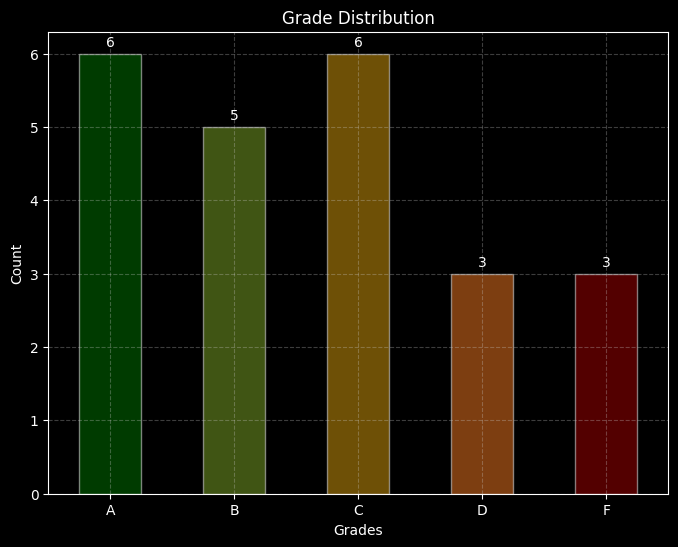

In [6]:
#counting the different grades
grades_counted = grades_12a.value_counts('grade').reindex(['A', 'B', 'C', 'D', 'F'])

# determining the size and style
plt.style.use('dark_background')
plt.figure(figsize=(8,6))

# creating the plot (via pandas .plot)
grades_counted.plot(kind='bar', 
                    rot=0, 
                    color=plot_colors,
                    edgecolor="#cccccc",
                    alpha=0.6)

# adding a grid for visibility
plt.grid(True,
          color='#cccccc',
            linewidth=0.8,
              linestyle='--',
                alpha=0.3)

# labels
plt.title('Grade Distribution')
plt.xlabel('Grades')
plt.ylabel('Count')

# labeling the bars
for i, value in enumerate(grades_counted):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

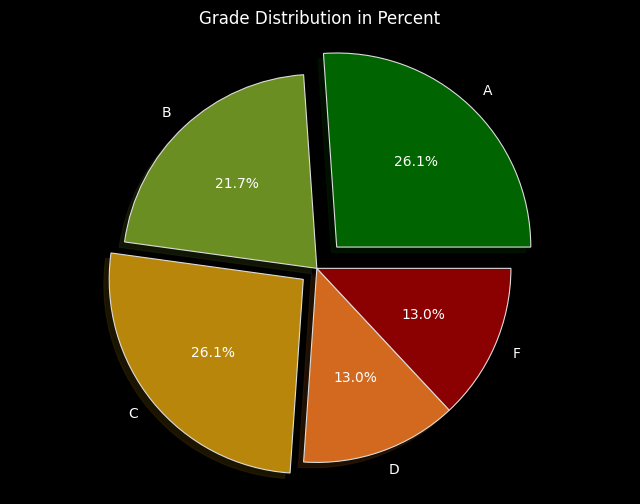

In [7]:
# creating a pie chart for more visualization

# determining which pies should explode (most values)
explode_pies = (0.15, 0, 0.09, 0, 0)

plt.style.use('dark_background')
plt.figure(figsize=(8,6))


plt.pie(grades_counted,
        autopct='%1.1f%%',
        shadow=True,
        colors=plot_colors,
        explode=explode_pies,
        labels=grades_counted.index,
        wedgeprops={'edgecolor': 'gainsboro', 'linewidth': 0.8})


plt.title('Grade Distribution in Percent')
plt.ylabel('')
plt.axis('equal')
plt.show()


### Score distibution via Histogram

In [8]:
# cleaning the data
cleaned_avg_scores = grades_12a['average'].dropna()

print(len(cleaned_avg_scores))  # checking how many values we got after cleaning (should be 23)
print(cleaned_avg_scores.max() - cleaned_avg_scores.min())  # checking how spread out the data is

23
70.66666666666667


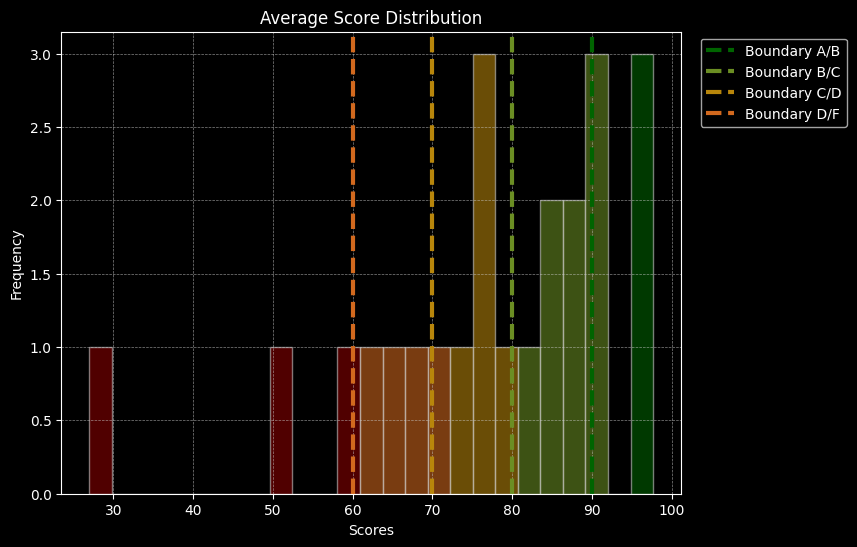

In [9]:
# creating the histogram (now with plt-function)
plt.style.use('dark_background')
plt.figure(figsize=(8,6))


# plotting the histogram
n, bins, patches = plt.hist(x=cleaned_avg_scores,
                            bins=25,
                            edgecolor= '#cccccc',
                            alpha=0.58)


# dyeing the bars according the grades
for patch in patches:
    bin_left_edge = patch.get_x()
    if bin_left_edge >= 90:
        patch.set_facecolor(plot_colors[0])  # Grade A
    elif bin_left_edge >= 80:
        patch.set_facecolor(plot_colors[1])  # Grade B
    elif bin_left_edge >= 70:
        patch.set_facecolor(plot_colors[2])  # Grade C
    elif bin_left_edge >= 60:
        patch.set_facecolor(plot_colors[3])  # Grade D
    else:
        patch.set_facecolor(plot_colors[4])  # Grade F

# adding a grid to improve readability
plt.grid(True, 
          color='#cccccc', 
           linestyle='--', 
            linewidth=0.5,
             alpha=0.65) 

# setting boundaries
boundaries = [90, 80, 70, 60]
boundary_labels = ['Boundary A/B', 'Boundary B/C', 'Boundary C/D', 'Boundary D/F']

for boundary, color, label in zip(boundaries, plot_colors, boundary_labels):
    plt.axvline(x=boundary,
                color=color,
                label= label,
                linewidth=3,
                linestyle = '--')

# labels
plt.title('Average Score Distribution')
plt.ylabel('Frequency')
plt.xlabel('Scores')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

### Individual Student Performance via bar chart

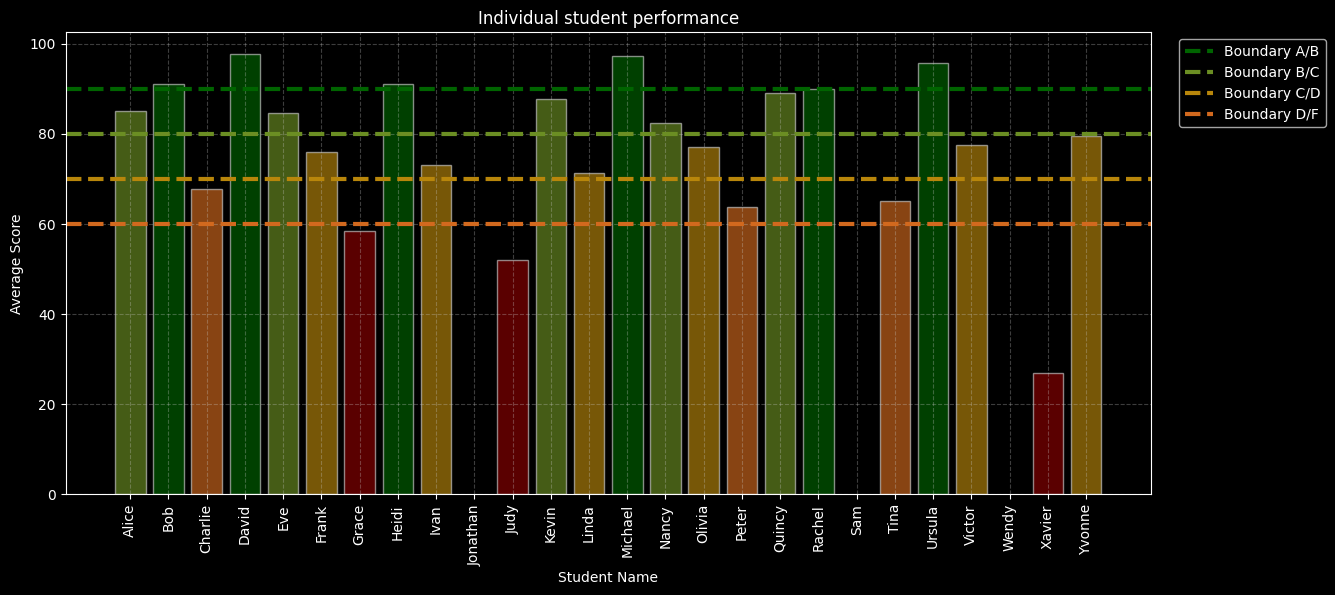

In [10]:
# creating a new list to provide colors for each student based on grade
sorted_names = grades_12a.sort_values('name', ascending=True)
student_colors = [grade_to_color.get(grade, 'grey') for grade in sorted_names['grade']]

# setting size and style
plt.style.use('dark_background')
plt.figure(figsize=(14,6))

# plotting
plt.bar(data=sorted_names,
        x='name',
        height='average',
        color=student_colors,
        edgecolor="#cccccc",
        alpha=0.65)

plt.xticks(rotation=90)

# creating boundary lines
for boundary, color, label in zip(boundaries, colors, boundary_labels):
    plt.axhline(y=boundary,
                color=color,
                label= label,
                linewidth=3,
                linestyle = '--')

# setting up a grid for readability
plt.grid(True,
          color='#cccccc',
            linewidth=0.8,
              linestyle='--',
                alpha=0.3)

# labels
plt.title('Individual student performance')
plt.xlabel('Student Name')
plt.ylabel('Average Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

### Grade Analysis via Boxlplot, violin chart and scatter plot

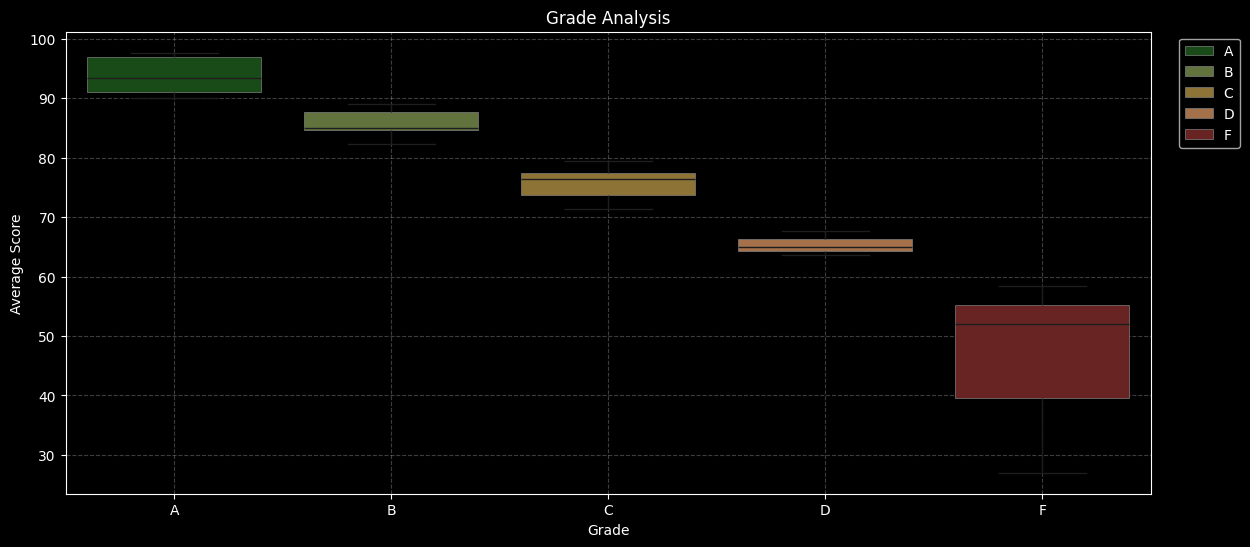

In [11]:
# import seaborn to create Analysis-Plots
import seaborn as sns


# setting size and style
plt.style.use('dark_background')
plt.figure(figsize=(14,6))

# plotting
sns.boxplot(data=sorted_grades,
            x='grade', y='average',
            order=grade_order,
            hue = 'grade',
            hue_order=grade_order,
            palette=grade_to_color,
            legend=True,
            saturation=0.5,
            boxprops={'edgecolor': 'gray', 'linewidth': 0.5})

# adding a grid for readability
plt.grid(True,
          color='#cccccc',
            linewidth=0.8,
              linestyle='--',
                alpha=0.3)

# labels
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('Grade Analysis')
plt.ylabel('Average Score')
plt.xlabel('Grade')
plt.show()

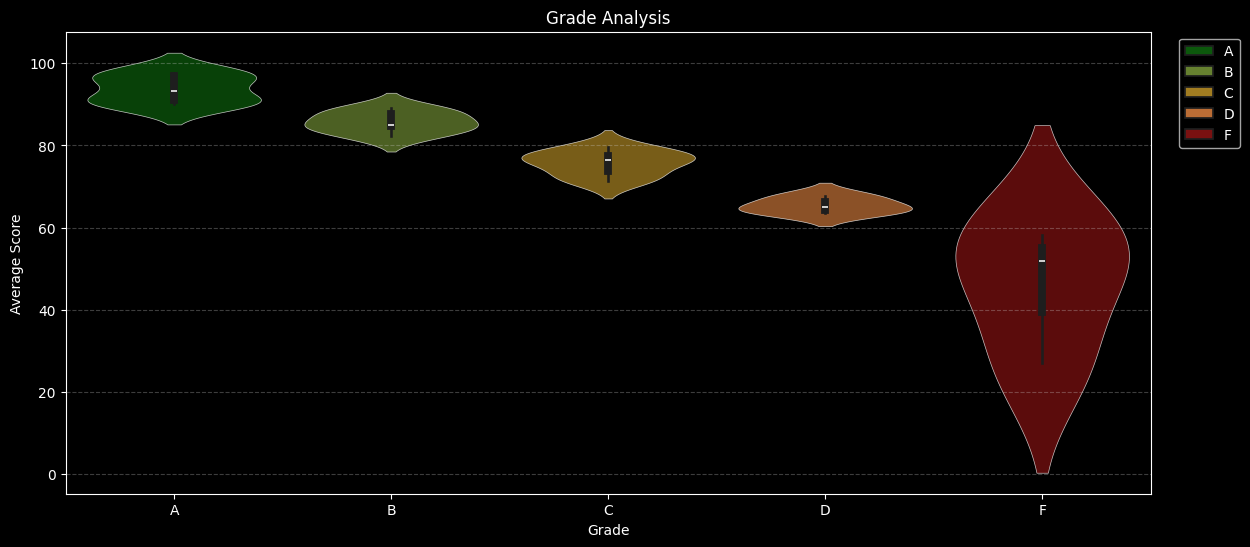

In [12]:
# setting size and style
plt.style.use('dark_background')

fig, ax= plt.subplots(figsize=(14,6))


# adding a grid for readability
ax.grid(True,
        color='#cccccc',
        linewidth=0.8,
        linestyle='--',
        alpha=0.3)


# setting up a violin plot
sns.violinplot(data=sorted_grades,
               x='grade',
               y='average',
               hue='grade',
               palette=plot_colors,
               legend='auto',
               order=grade_order,
               hue_order=grade_order,
               ax=ax)

# looping through main shapes to style them
for shape in ax.collections:
    shape.set_alpha(0.75)
    shape.set_edgecolor('white')
    shape.set_linewidth(0.5)

# labels
plt.title('Grade Analysis')
plt.ylabel('Average Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlabel('Grade')
plt.show()

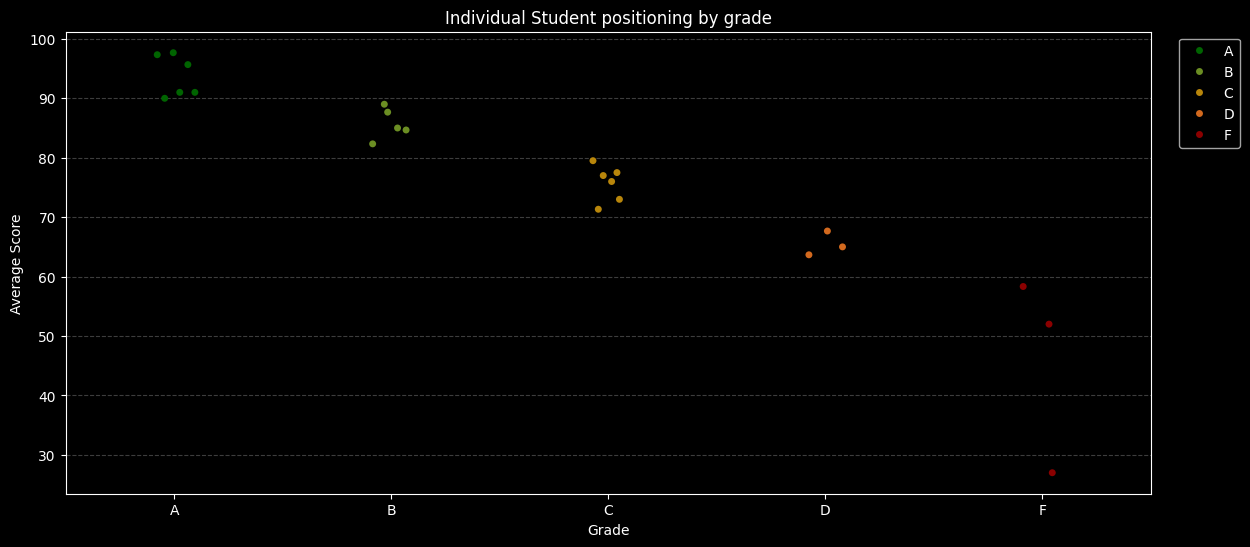

In [13]:
# # setting size and style
plt.style.use('dark_background')
plt.figure(figsize=(14,6))


# adding a grid for readability
plt.grid(True,
          color='#cccccc',
            linewidth=0.8,
              linestyle='--',
                alpha=0.3)

# plotting the scatterplot
sns.stripplot(data=sorted_grades,
                x='grade', y='average',
                hue='grade',
                palette=grade_to_color,
                jitter=True)


plt.title('Individual Student positioning by grade')
plt.xlabel('Grade')
plt.ylabel('Average Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [47]:
# creating a scatter plot with hovered names using plotly
import plotly.express as px

fig = px.strip(sorted_grades,
         x='grade', 
         y='average',
         hover_data=['name'],
         color='grade',
         color_discrete_map=grade_to_color,
         title='Indivdiual Student Postioning by Grade',
         template="plotly_dark",
         )


fig.update_layout(xaxis_title='Grade',
                  yaxis_title='Average Score',
                  plot_bgcolor='rgba(0,0,0,0)', 
                  xaxis=dict(showgrid=True,gridcolor='rgba(204,204,204,0.3)', griddash='dash', showline=True, linecolor='#cccccc'),
                  yaxis=dict(showgrid=True,gridcolor='rgba(204,204,204,0.3)', griddash='dash', showline=True, linecolor='#cccccc'))

fig.show()